Columns in creditcard_df: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Columns in fraud_df: Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')
Columns in ip_df: Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')


C:\Users\user\AppData\Local\Temp\ipykernel_23380\3341560556.py:30: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  merged_df = pd.merge(


Summary statistics:
              user_id  purchase_value            age    ip_address  \
count  151112.000000   151112.000000  151112.000000  1.511120e+05   
mean   200171.040970       36.935372      33.140704  2.152145e+09   
std    115369.285024       18.322762       8.617733  1.248497e+09   
min         2.000000        9.000000      18.000000  5.209350e+04   
25%    100642.500000       22.000000      27.000000  1.085934e+09   
50%    199958.000000       35.000000      33.000000  2.154770e+09   
75%    300054.000000       49.000000      39.000000  3.243258e+09   
max    400000.000000      154.000000      76.000000  4.294850e+09   

               class  transaction_amount  is_high_risk  
count  151112.000000       151112.000000      151112.0  
mean        0.093646           36.935372           0.0  
std         0.291336           18.322762           0.0  
min         0.000000            9.000000           0.0  
25%         0.000000           22.000000           0.0  
50%         0.0

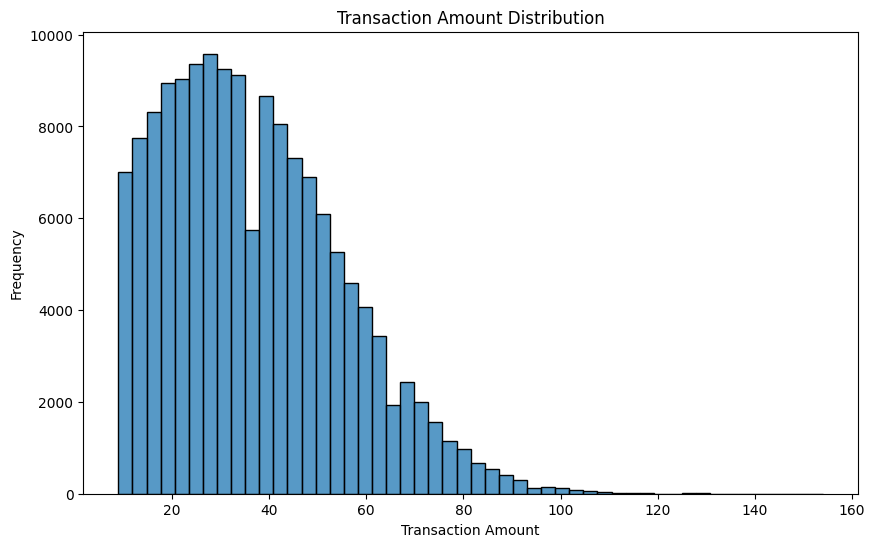

Cross-validation scores: [0.92092078 0.92063717 0.91600492 0.91878988 0.91751359]
Mean cross-validation score: 0.9187732681364565
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     41089
           1       0.59      0.48      0.53      4245

    accuracy                           0.92     45334
   macro avg       0.77      0.72      0.74     45334
weighted avg       0.91      0.92      0.92     45334

Confusion Matrix:
 [[39687  1402]
 [ 2208  2037]]


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Set display options
pd.set_option('display.max_columns', None)

# Function to preprocess data
def preprocess_data():
    # Load datasets
    creditcard_df = pd.read_csv(r'C:/Users/user/Desktop/Github/Adey_FraudDetection/data/creditcard.csv')
    fraud_df = pd.read_csv(r'C:/Users/user/Desktop/Github/Adey_FraudDetection/data/Fraud_Data.csv')
    ip_df = pd.read_csv(r'C:/Users/user/Desktop/Github/Adey_FraudDetection/data/IpAddress_to_Country.csv')

    # Display columns in the datasets
    print("Columns in creditcard_df:", creditcard_df.columns)
    print("Columns in fraud_df:", fraud_df.columns)
    print("Columns in ip_df:", ip_df.columns)

    # Ensure IP columns are integers
    ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(int)
    ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(int)

    # Merge fraud_df with ip_df based on IP address
    merged_df = pd.merge(
        fraud_df, ip_df, how='left', 
        left_on='ip_address', right_on='lower_bound_ip_address'
    )

    # Drop columns not needed after merging
    merged_df.drop(['lower_bound_ip_address', 'upper_bound_ip_address'], axis=1, inplace=True)

    # Check if 'transaction_amount' column exists
    if 'purchase_value' not in merged_df.columns:
        print("Column 'purchase_value' not found. Available columns are:", merged_df.columns)
    else:
        merged_df['transaction_amount'] = merged_df['purchase_value']
    
    # Feature engineering
    merged_df['is_high_risk'] = np.where(merged_df['transaction_amount'] > 1000, 1, 0)

    # One-hot encoding for categorical features
    merged_df = pd.get_dummies(merged_df, columns=['source', 'browser', 'sex'], drop_first=True)

    # Summary statistics
    print("Summary statistics:\n", merged_df.describe())

    # Return preprocessed data
    return merged_df

# Function for exploratory data analysis
def exploratory_data_analysis(df):
    # Plot histogram of transaction amounts if column exists
    if 'transaction_amount' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df['transaction_amount'], bins=50)
        plt.title('Transaction Amount Distribution')
        plt.xlabel('Transaction Amount')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("Column 'transaction_amount' not found for EDA.")

# Function to train and evaluate model with cross-validation
def model_training_and_evaluation(df):
    # Selecting features and target variable
    X = df.drop(columns=['class', 'user_id', 'signup_time', 'purchase_time', 'device_id', 'ip_address', 'purchase_value'])
    y = df['class']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Initialize the model
    model = RandomForestClassifier(random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # Print cross-validation results
    print("Cross-validation scores:", cv_scores)
    print("Mean cross-validation score:", cv_scores.mean())

    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Print classification report and confusion matrix
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Main execution
if __name__ == '__main__':
    # Run the data preprocessing pipeline
    merged_df = preprocess_data()

    # Conduct EDA
    exploratory_data_analysis(merged_df)

    # Train and evaluate model
    model_training_and_evaluation(merged_df)
